# Introduction to Data Science 2025

# Week 6: Recap

## Exercise 1 | Linear regression with feature selection

Download the [TED Talks](https://www.kaggle.com/rounakbanik/ted-talks) dataset from Kaggle. Your task is to predict both the ratings and the number of views of a given TED talk. You should focus only on the <span style="font-weight: bold">ted_main</span> table.

1. Download the data, extract the following ratings from column <span style="font-weight: bold">ratings</span>: <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, <span style="font-weight: bold">Inspiring</span>. Store these values into respective columns so that they are easier to access. Next, extract the tags from column <span style="font-weight: bold">tags</span>. Count the number of occurrences of each tag and select the top-100 most common tags. Create a binary variable for each of these and include them in your data table, so that you can directly see whether a given tag (among the top-100 tags) is used in a given TED talk or not. The dataset you compose should have dimension (2550, 104), and comprise of the 'views' column, the three columns with counts of "Funny", "Confusing and "Inspiring" ratings, and 100 columns which one-hot encode the top-100 most common tag columns.


In [3]:
# Use this cell for your code
import pandas as pd
import numpy as np
import json

ted_main = pd.read_csv("ted_main.csv")
transcripts = pd.read_csv("transcripts.csv")

In [4]:
ted_wrangled = pd.DataFrame(ted_main['views'])

In [5]:
json_dump = ted_main["ratings"].apply(lambda x: json.loads(x.replace("'", '"')))

Funny = []
Confusing = []
Inspiring = []
for i in range(len(json_dump)):
    for d in json_dump[i]:
        if d["name"] in ["Funny"]:
            Funny.append(d["count"])
        if d["name"] in ["Confusing"]:
            Confusing.append(d["count"])
        if d["name"] in ["Inspiring"]:
            Inspiring.append(d["count"])


ted_wrangled['Funny'] = Funny
ted_wrangled['Confusing'] = Confusing
ted_wrangled['Inspiring'] = Inspiring


In [6]:
counter = []

for i in range(len(ted_main)):
    for item in ted_main['tags'][i][1:-1].split(','):
        counter.append(item.strip().replace("'", ""))

top = pd.Series(counter).value_counts()[0:100]
top = top.reset_index()

top_tags = top['index'].tolist()

for tag in top_tags:
    ted_wrangled[f"tag_{tag}"] = ted_main['tags'].apply(lambda tags: 1 if tag in tags else 0)






/var/folders/3h/f7z_f91n40n8lnfl_ysjxmdh0000gp/T/ipykernel_49941/3280007904.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ted_wrangled[f"tag_{tag}"] = ted_main['tags'].apply(lambda tags: 1 if tag in tags else 0)
/var/folders/3h/f7z_f91n40n8lnfl_ysjxmdh0000gp/T/ipykernel_49941/3280007904.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ted_wrangled[f"tag_{tag}"] = ted_main['tags'].apply(lambda tags: 1 if tag in tags else 0)
/var/folders/3h/f7z_f91n40n8lnfl_ysjxmdh0000gp/T/ipykernel_49941/3280007904.py:13: PerformanceWa

In [7]:
ted_wrangled

,views,Funny,Confusing,Inspiring,tag_technology,tag_science,tag_global issues,tag_culture,tag_TEDx,tag_design,tag_business,tag_entertainment,tag_health,tag_innovation,tag_society,tag_art,tag_social change,tag_future,tag_communication,tag_creativity,tag_biology,tag_humanity,tag_collaboration,tag_environment,tag_economics,tag_medicine,tag_brain,tag_activism,tag_education,tag_community,tag_history,tag_TED Fellows,tag_children,tag_music,tag_invention,tag_health care,tag_politics,tag_cities,tag_psychology,tag_storytelling,...,tag_sustainability,tag_disease,tag_oceans,tag_physics,tag_green,tag_potential,tag_happiness,tag_biotech,tag_mind,tag_work,tag_violence,tag_media,tag_evolution,tag_film,tag_writing,tag_big problems,tag_entrepreneur,tag_global development,tag_philosophy,tag_beauty,tag_motivation,tag_biodiversity,tag_genetics,tag_space,tag_robots,tag_mental health,tag_poverty,tag_language,tag_cognitive science,tag_math,tag_food,tag_religion,tag_family,tag_peace,tag_ecology,tag_illness,tag_demo,tag_poetry,tag_universe,tag_social media
0,47227110,19645,242,24924,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3200520,544,62,413,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1636292,964,27,230,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1697550,59,32,1070,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12005869,1390,72,2893,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,450430,1,2,27,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2546,417470,20,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2547,375647,1,5,30,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2548,419309,63,1,147,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


2. Construct a linear regression model to predict the number of views based on the data in the <span style="font-weight: bold">ted_main</span> table, including the binary variables for the top-100 tags that you just created.

In [8]:
import statsmodels.api as sm

y = ted_wrangled['views']
X = ted_wrangled.iloc[:, 1:103]


model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  views   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              90.19
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                        0.00
Time:                        11:40:11   Log-Likelihood:                         -39678.
No. Observations:                2550   AIC:                                  7.956e+04
Df Residuals:                    2448   BIC:                                  8.016e+04
Df Model:                         102                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Funny                   1111.7083     59.948     18.545      0.000     994.155    1229.262
Confusing               1.442e+04    994.402     14.504      0.000    1.25e+04    1.64e+04
Inspiring               1160.3444     26.762     43.358      0.000    1107.866    1212.822
tag_technology          2.457e+05   7.06e+04      3.479      0.001    1.07e+05    3.84e+05
tag_science             4.593e+04   9.17e+04      0.501      0.617   -1.34e+05    2.26e+05
tag_global issues      -1.466e+04   7.95e+04     -0.184      0.854   -1.71e+05    1.41e+05
tag_culture             2.504e+05   7.29e+04      3.437      0.001    1.08e+05    3.93e+05
tag_TEDx                1.674e+04   7.41e+04      0.226      0.821   -1.29e+05    1.62e+05
tag_design              1.276e+04   8.81e+04      0.145      0.885    -1.6e+05    1.86e+05
tag_business            2.063e+05   9.03e+04      2.284      0.022    2.92e+04    3.83e+05
tag_entertainment        5.91e+04   1.02e+05      0.580      0.562   -1.41e+05    2.59e+05
tag_health              3.204e+05   1.35e+05      2.374      0.018    5.58e+04    5.85e+05
tag_innovation         -1.188e+05   1.23e+05     -0.969      0.332   -3.59e+05    1.22e+05
tag_society             1.588e+05   1.26e+05      1.256      0.209    -8.9e+04    4.07e+05
tag_art                 9061.3613   9.98e+04      0.091      0.928   -1.87e+05    2.05e+05
tag_social change      -4.547e+04    1.2e+05     -0.378      0.705   -2.81e+05     1.9e+05
tag_future             -8.236e+04   1.24e+05     -0.664      0.507   -3.26e+05    1.61e+05
tag_communication       1.569e+05    1.2e+05      1.309      0.191   -7.82e+04    3.92e+05
tag_creativity         -9.787e+04   1.13e+05     -0.863      0.388    -3.2e+05    1.25e+05
tag_biology              1.76e+05   1.32e+05      1.335      0.182   -8.25e+04    4.34e+05
tag_humanity            6.415e+04    1.3e+05      0.494      0.621   -1.91e+05    3.19e+05
tag_collaboration      -7.727e+04   1.23e+05     -0.631      0.528   -3.18e+05    1.63e+05
tag_environment        -3.108e+04   1.53e+05     -0.204      0.839    -3.3e+05    2.68e+05
tag_economics           9.111e+04   1.23e+05      0.741      0.459    -1.5e+05    3.32e+05
tag_medicine            2.038e+05   1.55e+05      1.311      0.190   -1.01e+05    5.09e+05
tag_brain               3.937e+05   1.59e+05      2.483      0.013    8.28e+04    7.05e+05
tag_activism           -2.208e+04   1.28e+05     -0.172      0.863   -2.74e+05     2.3e+05
tag_education           8.904e+04   1.28e+05      0.698      0.485   -1.61e+05    3.39e+05
tag_community           -1.42e+05   1.37e+05     -1.034      0.301   -4.11e+05    1.27e+05
tag_history             2.126e+05   1.27e+05      1.674      0.094   -3.

3. Do the same for the <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, and <span style="font-weight: bold">Inspiring</span> ratings.

In [9]:
y = ted_wrangled['Funny']
X = ted_wrangled.iloc[:, 4:103]


model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Funny   R-squared (uncentered):                   0.209
Model:                            OLS   Adj. R-squared (uncentered):              0.177
Method:                 Least Squares   F-statistic:                              6.554
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                    2.51e-70
Time:                        11:40:11   Log-Likelihood:                         -19669.
No. Observations:                2550   AIC:                                  3.954e+04
Df Residuals:                    2451   BIC:                                  4.011e+04
Df Model:                          99                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
tag_technology            12.1931     27.510      0.443      0.658     -41.752      66.138
tag_science               43.4112     35.562      1.221      0.222     -26.323     113.145
tag_global issues        -34.9142     31.012     -1.126      0.260     -95.727      25.899
tag_culture              149.7190     27.902      5.366      0.000      95.005     204.433
tag_TEDx                  34.8490     28.930      1.205      0.228     -21.882      91.580
tag_design               -57.7807     34.334     -1.683      0.093    -125.107       9.545
tag_business              38.2531     34.977      1.094      0.274     -30.334     106.840
tag_entertainment        200.8348     39.411      5.096      0.000     123.553     278.116
tag_health                17.6824     52.651      0.336      0.737     -85.563     120.927
tag_innovation            26.2116     47.766      0.549      0.583     -67.454     119.877
tag_society              -68.1490     49.342     -1.381      0.167    -164.905      28.607
tag_art                  -67.6619     38.991     -1.735      0.083    -144.120       8.796
tag_social change         39.4143     46.962      0.839      0.401     -52.675     131.503
tag_future               -31.5168     48.444     -0.651      0.515    -126.512      63.479
tag_communication         84.4743     46.814      1.804      0.071      -7.326     176.274
tag_creativity           202.5934     44.070      4.597      0.000     116.175     289.012
tag_biology                2.6102     51.484      0.051      0.960     -98.347     103.568
tag_humanity             -49.1099     50.747     -0.968      0.333    -148.621      50.401
tag_collaboration        -53.6100     47.846     -1.120      0.263    -147.433      40.213
tag_environment           30.4505     59.598      0.511      0.609     -86.417     147.318
tag_economics             -6.9953     47.896     -0.146      0.884    -100.917      86.926
tag_medicine             -11.6866     60.735     -0.192      0.847    -130.784     107.411
tag_brain                 72.2322     61.630      1.172      0.241     -48.620     193.084
tag_activism              -8.7359     50.130     -0.174      0.862    -107.038      89.567
tag_education            125.6313     49.647      2.530      0.011      28.277     222.986
tag_community             38.6923     53.634      0.721      0.471     -66.480     143.865
tag_history               -4.9161     49.584     -0.099      0.921    -102.148      92.316
tag_TED Fellows           -7.3181     49.080     -0.149      0.881    -103.560      88.924
tag_children             179.1177     53.375      3.356      0.001      74.453     283.783
tag_music                -79.1796     72.536     -1.092      0.275    -2

In [10]:
y = ted_wrangled['Confusing']
X = ted_wrangled.iloc[:, 4:103]


model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Confusing   R-squared (uncentered):                   0.375
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              14.83
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   6.88e-183
Time:                        11:40:11   Log-Likelihood:                         -12287.
No. Observations:                2550   AIC:                                  2.477e+04
Df Residuals:                    2451   BIC:                                  2.535e+04
Df Model:                          99                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
tag_technology             6.1008      1.522      4.009      0.000       3.117       9.085
tag_science               11.2095      1.967      5.699      0.000       7.352      15.067
tag_global issues          3.9552      1.715      2.306      0.021       0.591       7.319
tag_culture               14.5012      1.543      9.396      0.000      11.475      17.528
tag_TEDx                   1.5755      1.600      0.985      0.325      -1.562       4.714
tag_design                 5.4245      1.899      2.856      0.004       1.700       9.149
tag_business               9.6504      1.935      4.988      0.000       5.857      13.444
tag_entertainment         10.2283      2.180      4.692      0.000       5.954      14.503
tag_health                 0.3742      2.912      0.128      0.898      -5.337       6.085
tag_innovation            -7.8990      2.642     -2.990      0.003     -13.080      -2.718
tag_society               -4.1224      2.729     -1.510      0.131      -9.474       1.230
tag_art                    0.5119      2.157      0.237      0.812      -3.717       4.741
tag_social change          0.3495      2.598      0.135      0.893      -4.744       5.443
tag_future                 3.5286      2.680      1.317      0.188      -1.726       8.783
tag_communication          0.5111      2.589      0.197      0.844      -4.567       5.589
tag_creativity             5.5419      2.438      2.273      0.023       0.762      10.322
tag_biology               -0.6888      2.848     -0.242      0.809      -6.273       4.896
tag_humanity               0.8423      2.807      0.300      0.764      -4.662       6.347
tag_collaboration         -4.6847      2.647     -1.770      0.077      -9.874       0.505
tag_environment            1.9567      3.297      0.594      0.553      -4.508       8.421
tag_economics              2.3688      2.649      0.894      0.371      -2.826       7.564
tag_medicine              -1.2050      3.360     -0.359      0.720      -7.793       5.383
tag_brain                 16.9065      3.409      4.959      0.000      10.222      23.591
tag_activism               2.1417      2.773      0.772      0.440      -3.296       7.579
tag_education              3.4313      2.746      1.249      0.212      -1.954       8.816
tag_community              0.9452      2.967      0.319      0.750      -4.872       6.763
tag_history               -4.8223      2.743     -1.758      0.079     -10.201       0.556
tag_TED Fellows            3.3053      2.715      1.218      0.224      -2.018       8.629
tag_children               0.6764      2.952      0.229      0.819      -5.113       6.466
tag_music                 -4.0636      4.012     -1.013      0.311     -

In [11]:
y = ted_wrangled['Inspiring']
X = ted_wrangled.iloc[:, 4:103]

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Inspiring   R-squared (uncentered):                   0.229
Model:                            OLS   Adj. R-squared (uncentered):              0.198
Method:                 Least Squares   F-statistic:                              7.355
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                    6.92e-82
Time:                        11:40:11   Log-Likelihood:                         -21791.
No. Observations:                2550   AIC:                                  4.378e+04
Df Residuals:                    2451   BIC:                                  4.436e+04
Df Model:                          99                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
tag_technology            34.7908     63.219      0.550      0.582     -89.178     158.759
tag_science              -41.0169     81.723     -0.502      0.616    -201.270     119.236
tag_global issues        106.6783     71.268      1.497      0.135     -33.074     246.430
tag_culture              383.5938     64.120      5.982      0.000     257.858     509.329
tag_TEDx                 137.7968     66.484      2.073      0.038       7.426     268.167
tag_design               -30.4072     78.901     -0.385      0.700    -185.126     124.312
tag_business             425.8290     80.379      5.298      0.000     268.212     583.446
tag_entertainment         63.0289     90.568      0.696      0.487    -114.569     240.626
tag_health               289.7426    120.995      2.395      0.017      52.479     527.006
tag_innovation            78.6829    109.768      0.717      0.474    -136.565     293.931
tag_society             -225.0251    113.390     -1.985      0.047    -447.376      -2.674
tag_art                  -81.2958     89.603     -0.907      0.364    -257.001      94.409
tag_social change        163.6388    107.921      1.516      0.130     -47.987     375.265
tag_future               -48.3034    111.328     -0.434      0.664    -266.609     170.002
tag_communication        137.6674    107.582      1.280      0.201     -73.294     348.629
tag_creativity           464.3041    101.276      4.585      0.000     265.709     662.899
tag_biology              126.5324    118.314      1.069      0.285    -105.474     358.539
tag_humanity             -76.0078    116.619     -0.652      0.515    -304.690     152.674
tag_collaboration       -114.9207    109.954     -1.045      0.296    -330.533     100.691
tag_environment          -31.6319    136.960     -0.231      0.817    -300.201     236.937
tag_economics           -376.3083    110.069     -3.419      0.001    -592.146    -160.471
tag_medicine              53.1311    139.573      0.381      0.703    -220.563     326.825
tag_brain                367.6554    141.629      2.596      0.009      89.930     645.380
tag_activism              27.6986    115.203      0.240      0.810    -198.207     253.604
tag_education            538.9593    114.092      4.724      0.000     315.233     762.686
tag_community             56.0190    123.254      0.454      0.650    -185.674     297.712
tag_history             -182.5412    113.948     -1.602      0.109    -405.985      40.903
tag_TED Fellows          -40.7241    112.789     -0.361      0.718    -261.895     180.447
tag_children             112.8700    122.659      0.920      0.358    -127.656     353.396
tag_music                 34.9360    166.692      0.210      0.834    -2

4. You will probably notice that most of the tags are not useful in predicting the views and the ratings. You should use some kind of variable selection to prune the set of tags that are included in the model. You can use for example classical p-values or more modern [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) techniques. Which tags are the best predictors of each of the response variables?

In [12]:
def prune(X, y, threshold):
    model = sm.OLS(y, X).fit()
    worst_listed = []
    while True:
        pvalues = model.pvalues
        max_pval = pvalues.max()
        if max_pval > threshold:
            worst_feature = pvalues.idxmax()
            worst_listed.append((worst_feature, max(pvalues)))
            X = X.drop(columns=worst_feature)
            model = sm.OLS(y, X).fit()
        else:
            break
    return model, worst_listed

y = ted_wrangled['views']
X = ted_wrangled.iloc[:, 4:103]

pruned_model, worst_features = prune(X, y, 0.05)
pruned_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  views   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              54.81
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   2.58e-202
Time:                        11:40:13   Log-Likelihood:                         -41151.
No. Observations:                2550   AIC:                                  8.235e+04
Df Residuals:                    2527   BIC:                                  8.248e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
tag_technology     4.494e+05   1.06e+05      4.232      0.000    2.41e+05    6.58e+05
tag_science        3.748e+05   1.29e+05      2.913      0.004    1.22e+05    6.27e+05
tag_culture        1.114e+06   1.16e+05      9.584      0.000    8.86e+05    1.34e+06
tag_TEDx           3.134e+05   1.25e+05      2.516      0.012    6.91e+04    5.58e+05
tag_business       8.595e+05   1.43e+05      6.013      0.000    5.79e+05    1.14e+06
tag_entertainment  5.462e+05   1.62e+05      3.365      0.001    2.28e+05    8.65e+05
tag_health         5.378e+05   1.64e+05      3.287      0.001    2.17e+05    8.59e+05
tag_communication  4.301e+05   1.91e+05      2.249      0.025    5.51e+04    8.05e+05
tag_creativity     7.328e+05   1.88e+05      3.899      0.000    3.64e+05     1.1e+06
tag_brain          1.156e+06   2.57e+05      4.501      0.000    6.52e+05    1.66e+06
tag_education      1.049e+06   2.05e+05      5.106      0.000    6.46e+05    1.45e+06
tag_psychology     2.052e+06    2.4e+05      8.545      0.000    1.58e+06    2.52e+06
tag_performance    7.307e+05   2.33e+05      3.131      0.002    2.73e+05    1.19e+06
tag_humor          1.197e+06   2.51e+05      4.761      0.000    7.04e+05    1.69e+06
tag_photography    9.117e+05   2.62e+05      3.486      0.000    3.99e+05    1.42e+06
tag_neuroscience  -8.452e+05    3.4e+05     -2.486      0.013   -1.51e+06   -1.79e+05
tag_work           1.631e+06   3.01e+05      5.426      0.000    1.04e+06    2.22e+06
tag_writing        8.259e+05   3.14e+05      2.633      0.009    2.11e+05    1.44e+06
tag_motivation     1.259e+06   3.23e+05      3.892      0.000    6.25e+05    1.89e+06
tag_mental health  9.286e+05   3.85e+05      2.412      0.016    1.74e+05    1.68e+06
tag_language       9.629e+05   3.09e+05      3.119      0.002    3.57e+05    1.57e+06
tag_demo           7.227e+05   2.54e+05      2.847      0.004    2.25e+05    1.22e+06
tag_universe       8.998e+05   3.58e+05      2.513      0.012    1.98e+05     1.6e+06
==============================================================================
Omnibus:                     3350.447   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889797.919
Skew:                           7.127   Prob(JB):                         0.00
Kurtosis:                      93.396   Cond. No.                         5.67
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(worst_features)

[('tag_environment', 0.9830424994253524), ('tag_identity', 0.9814403547666223), ('tag_mind', 0.9798829369111017), ('tag_poetry', 0.9777689083498582), ('tag_beauty', 0.9664440780932642), ('tag_design', 0.9565784920827558), ('tag_engineering', 0.9440254996698514), ('tag_community', 0.93111964969137), ('tag_invention', 0.9155586176992435), ('tag_biotech', 0.9015333242227694), ('tag_activism', 0.8935622420368325), ('tag_family', 0.8882025890066654), ('tag_media', 0.8882583139933322), ('tag_medical research', 0.8810372948220623), ('tag_potential', 0.8833922354595951), ('tag_exploration', 0.818849360461155), ('tag_film', 0.8217589450613482), ('tag_computers', 0.817680332926984), ('tag_life', 0.8165847395197486), ('tag_cities', 0.8112068115971265), ('tag_big problems', 0.8096261605311796), ('tag_music', 0.7802873000891202), ('tag_history', 0.736334282399452), ('tag_sustainability', 0.7248493368613835), ('tag_green', 0.7662815071111901), ('tag_humanity', 0.720912180508346), ('tag_biodiversity'

In [14]:
def prune(X, y, threshold):
    model = sm.OLS(y, X).fit()
    worst_listed = []
    while True:
        pvalues = model.pvalues
        max_pval = pvalues.max()
        if max_pval > threshold:
            worst_feature = pvalues.idxmax()
            worst_listed.append((worst_feature, max(pvalues)))
            X = X.drop(columns=worst_feature)
            model = sm.OLS(y, X).fit()
        else:
            break
    return model, worst_listed

y = ted_wrangled['Funny']
X = ted_wrangled.iloc[:, 4:103]

pruned_model, worst_features = prune(X, y, 0.05)
pruned_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Funny   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.188
Method:                 Least Squares   F-statistic:                              43.26
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   3.65e-107
Time:                        11:40:15   Log-Likelihood:                         -19695.
No. Observations:                2550   AIC:                                  3.942e+04
Df Residuals:                    2536   BIC:                                  3.950e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
tag_culture         145.4957     24.943      5.833      0.000      96.585     194.406
tag_entertainment   176.8563     34.070      5.191      0.000     110.048     243.665
tag_art             -69.7169     34.369     -2.028      0.043    -137.111      -2.322
tag_creativity      181.3661     41.941      4.324      0.000      99.124     263.608
tag_education       143.3017     47.432      3.021      0.003      50.293     236.310
tag_children        133.6219     49.497      2.700      0.007      36.564     230.680
tag_psychology      206.4614     52.250      3.951      0.000     104.004     308.919
tag_humor           856.0229     55.506     15.422      0.000     747.181     964.865
tag_neuroscience   -168.8142     68.307     -2.471      0.014    -302.758     -34.871
tag_mind            199.8382     74.306      2.689      0.007      54.132     345.545
tag_work            237.3813     64.744      3.666      0.000     110.426     364.337
tag_writing         148.1993     68.003      2.179      0.029      14.852     281.546
tag_motivation      155.4381     71.489      2.174      0.030      15.255     295.621
tag_mental health   165.9299     78.399      2.116      0.034      12.198     319.662
==============================================================================
Omnibus:                     5598.700   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38354415.403
Skew:                          19.364   Prob(JB):                         0.00
Kurtosis:                     602.569   Cond. No.                         3.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(worst_features)

[('tag_green', 0.9973115045054866), ('tag_food', 0.9964402356251315), ('tag_exploration', 0.968743909291981), ('tag_disease', 0.9665872133797843), ('tag_biology', 0.9623403452855231), ('tag_physics', 0.9590283380246762), ('tag_language', 0.9583390325597747), ('tag_climate change', 0.9554608965796783), ('tag_life', 0.9495599032093123), ('tag_engineering', 0.9492905398876799), ('tag_big problems', 0.9418205147164771), ('tag_robots', 0.929435515630914), ('tag_space', 0.918284924488864), ('tag_history', 0.9163618478821656), ('tag_government', 0.9165844291483106), ('tag_war', 0.9060174459825825), ('tag_economics', 0.8817632341653389), ('tag_health care', 0.8826313959268952), ('tag_TED Fellows', 0.8797757262037572), ('tag_storytelling', 0.8671659590666786), ('tag_activism', 0.8667354482411774), ('tag_evolution', 0.8543769742304654), ('tag_universe', 0.8546174901348094), ('tag_illness', 0.8307666197876208), ('tag_medicine', 0.8427704222806749), ('tag_invention', 0.8030837482996533), ('tag_ine

5. Produce summaries of your results. Could you recommend good tags – or tags to avoid! – for speakers targeting plenty of views and/or certain ratings?

In [16]:
# Environment, identity and mind are the 3 worst tags to predict views. where as tech, science and culture are the best performing tags.
# For Funny the best ones are culture, entertainment and art where as the worst ones are green food, exploration and disease.


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification (part 2)

Note that it is strongly recommended to use Python in this exercise. However, if you can find a suitable AutoML implementation for your favorite language (e.g [here](http://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/automl.html) seems to be one for R) then you are free to use that language as well.

Use the preprocessed data from week 3 (you can also produce them using the example solutions of week 3).

1. This time train a *random forest classifier* on the data. A random forest is a collection of *decision trees*, which makes it an *ensemble* of classifiers. Each tree uses a random subset of the features to make its prediction. Without tuning any parameters, how is the accuracy?

In [35]:
# Use this cell for your code

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


pixel_x = pd.read_csv("pixel_exploded.csv")
target_y = pd.read_csv("target.csv")

X_train, X_test, y_train, y_test = train_test_split(
    pixel_x, target_y, test_size=0.33, random_state=42)


clf = RandomForestClassifier(random_state=44)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100890207715133

Classification Report:
               precision    recall  f1-score   support

          70       0.76      0.94      0.84        36
          71       0.85      1.00      0.92        44
          72       0.78      0.86      0.82        37
          73       0.82      0.88      0.85        48
          74       0.71      0.45      0.56        22
          75       0.94      0.62      0.75        24
          76       0.63      0.76      0.69        34
          77       0.92      0.96      0.94        23
          78       0.91      0.72      0.81        40
          79       0.90      0.66      0.76        29

    accuracy                           0.81       337
   macro avg       0.82      0.79      0.79       337
weighted avg       0.82      0.81      0.80       337


Confusion Matrix:
 [[34  1  1  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  1 32  2  1  0  0  0  1  0]
 [ 0  0  1 42  1  0  1  0  1  2]
 [ 1  4  0  0 10  0  7  0  0  0]
 [

2. The amount of trees to use as a part of the random forest is an example of a hyperparameter, because it is a parameter that is set prior to the learning process. In contrast, a parameter is a value in the model that is learned from the data. Train 20 classifiers, with varying amounts of decision trees starting from 10 up until 200, and plot the test accuracy as a function of the amount of classifiers. Does the accuracy keep increasing? Is more better?

In [55]:
a_scores = []
trees = []

for i in range(10,200,10):
    clf = RandomForestClassifier(n_estimators=i, random_state=44)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    trees.append(i)
    a_scores.append(accuracy_score(y_test, y_pred))

/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was

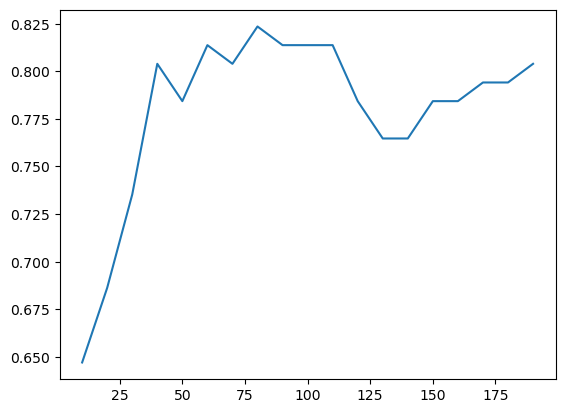

In [56]:
import matplotlib.pyplot as plt

plt.plot(trees, a_scores)

3. If we had picked the amount of decision trees by taking the value with the best test accuracy from the last plot, we would have *overfit* our hyperparameters to the test data. Can you see why it is a mistake to tune hyperparameters of your model by using the test data?

*You can use this markdown cell to write down your thoughts.*

So what happens when the model overfits, is that we cannot use it in real world data. In a random forest, more trees generally mean a lower accuracy but a more wide range of possible predictions which carry over to the real world well.


4. Reshuffle and resplit the data so that it is divided in 3 parts: training (80%), validation (10%) and test (10%). Repeatedly train a model of your choosing (e.g random forest) on the training data, and evaluate it’s performance on the validation set, while tuning the hyperparameters so that the accuracy on the validation set increases. Then, finally evaluate the performance of your model on the test data. What can you say in terms of the generalization of your model?

In [58]:
pixel_x = pd.read_csv("pixel_exploded.csv")
target_y = pd.read_csv("target.csv")
import itertools

X_train, X_test, y_train, y_test = train_test_split(pixel_x, target_y, test_size=0.1, random_state=42)

X_train,X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.111, random_state=42)

max_acc = 0

for i in range(10,200,10):
    clf = RandomForestClassifier(n_estimators=i, random_state=44)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validate)
    if accuracy_score(y_validate, y_pred) > max_acc:
        max_acc==accuracy_score(y_validate, y_pred)
        model = clf
    







/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was

In [60]:
y_pred = model.predict(X_test)

print(accuracy_score(y_validate, y_pred))

#We increased accuracy by 6 percentages

0.08823529411764706


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | TPOT

The process of picking a suitable model, evaluating its performance and tuning the hyperparameters is very time consuming. A new idea in machine learning is the concept of automating this by using an optimization algorithm to find the best model in the space of models and their hyperparameters. Have a look at [TPOT](https://github.com/EpistasisLab/tpot), an automated ML solution that finds a good model and a good set of hyperparameters automatically. Try it on this data, it should outperform simple models like the ones we tried easily. Note that running the algorithm might take a while, depending on the strength of your computer. 

*Note*: In case it is running for too long, try checking if the parameters you are using when calling TPOT are reasonable, i.e. try reducing number of ‘generations’ or ‘population_size’. TPOT uses cross-validation internally, so we don’t need our own validation set.

In [12]:
import tpot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


X = pd.read_csv("pixel_exploded.csv")
y = pd.read_csv("target.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

classification_optimizer = tpot.TPOTClassifier(search_space="linear-light", max_time_mins=30/60, n_jobs=30, cv=5)




In [ ]:
classification_optimizer.fit(X_train, y_train)

/opt/anaconda3/envs/tpotenv/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 58870 instead
  warnings.warn(
/opt/anaconda3/envs/tpotenv/lib/python3.10/site-packages/tpot/tpot_estimator/estimator.py:537: UserWarning: Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_
  warnings.warn("Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_")
/opt/anaconda3/envs/tpotenv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A c

AUROC (ovr) score: 0.9733613339136756


In [15]:
y_prob = classification_optimizer.predict_proba(X_test)

auroc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(auroc_score)

0.9733613339136756


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**